In [66]:
import numpy as np
import matplotlib.pyplot as plt

col = ['k', 'b', 'r', 'g', 'tab:orange', 'm', 'black', 'violet']
mar = ['o', '^', 'v', 's', 'D']

In [148]:
E12 = 10
E32 = 20
Es  = 0
dE = E32 - E12
u = 1
H_max = dE*8/u
dH = 0.05
H = np.arange(0, H_max+dH, dH)

<IPython.core.display.Javascript object>


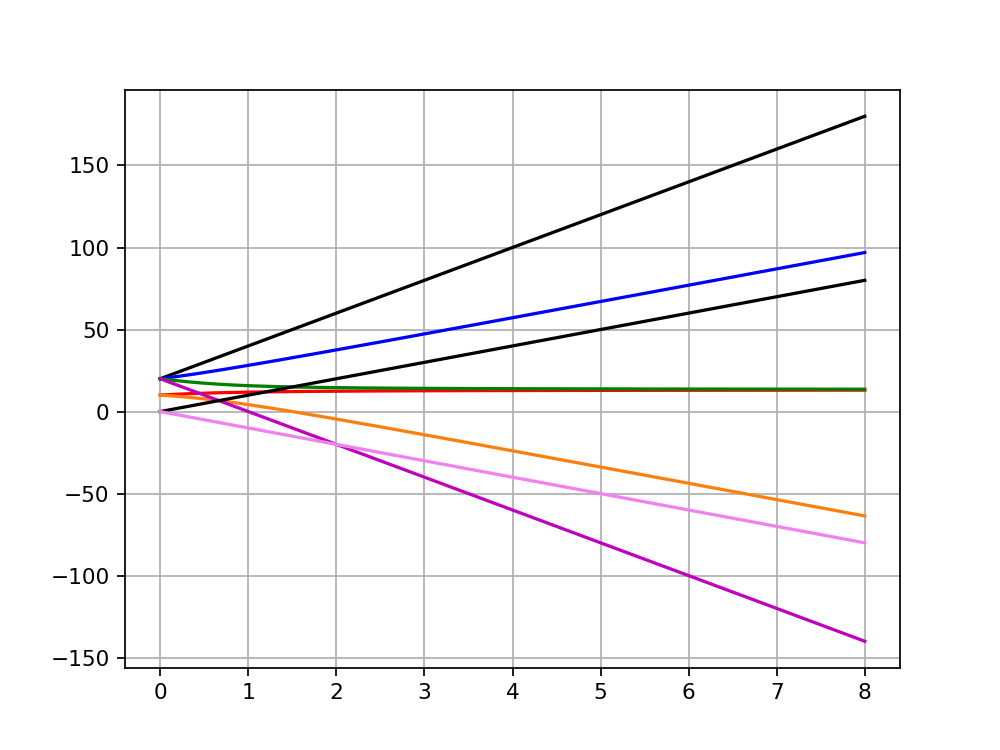

In [149]:
E1 = E32 + 2*u*H
E6 = E32 - 2*u*H

b1 = E12 + E32 + u*H
c1 = E12*E32 + u*H/3*(2*E12 + E32)
E2 = 0.5*(b1 + np.sqrt(b1**2 - 4*c1))
E3 = 0.5*(b1 - np.sqrt(b1**2 - 4*c1))

b2 = E12 + E32 - u*H
c2 = E12*E32 - u*H/3*(2*E12 + E32)
E4 = 0.5*(b2 + np.sqrt(b2**2 - 4*c2))
E5 = 0.5*(b2 - np.sqrt(b2**2 - 4*c2))

E7 = Es + u*H
E8 = Es - u*H

x = u*H/dE
%matplotlib notebook
plt.grid()
b = 0
e = None
plt.plot(x[b:e], E1[b:e], marker='', linestyle='-', c=col[0], label='1 P(3/2, 3/2)' )
plt.plot(x[b:e], E2[b:e], marker='', linestyle='-', c=col[1], label='2 P(3/2, 1/2)' )
plt.plot(x[b:e], E3[b:e], marker='', linestyle='-', c=col[2], label='3 P(1/2, 1/2)' )
plt.plot(x[b:e], E4[b:e], marker='', linestyle='-', c=col[3], label='4 P(3/2 -1/2)' )
plt.plot(x[b:e], E5[b:e], marker='', linestyle='-', c=col[4], label='5 P(1/2, -1/2)')
plt.plot(x[b:e], E6[b:e], marker='', linestyle='-', c=col[5], label='6 P(3/2, -3/2)')
plt.plot(x[b:e], E7[b:e], marker='', linestyle='-', c=col[6], label='7 S(1/2, 1/2)' )
plt.plot(x[b:e], E8[b:e], marker='', linestyle='-', c=col[7], label='8 S(1/2, -1/2)')

In [51]:
A = 1 * 10**(-9) #1
u = 5.79 * 10**(-9) #eV/Gs
H = np.linspace(0, 10000, 1000) #units
L = np.array([0, 0, 1, 1, 1, 1, 1, 1])
M = np.array([-0.5, 0.5, -0.5, 0.5, -1.5, -0.5, 0.5, 1.5])
e = A*(L + 0.5) #eV
Ep = np.zeros(shape=(8, 1000))
for j in range(8):
    if M[j] == L[j] + 0.5:
        Ep[j] = e[j] + u*(L[j]+1)*H
    elif M[j] == -L[j] - 0.5:
        Ep[j] = e[j] - u*(L[j]+1)*H
    else:
        Ep[j] = e[j]/2 + u*H*M[j] + (0.25*(e[j]**2 + u**2 * H**2) + u*H*M[j]*e[j]/(2*L[j] + 1))**(0.5)
Em = np.zeros(shape=(8, 1000))
for j in range(8):
    if M[j] == L[j] + 0.5:
        Em[j] = e[j] + u*(L[j]+1)*H
    elif M[j] == -L[j] - 0.5:
        Em[j] = e[j] - u*(L[j]+1)*H
    else:
        Em[j] = e[j]/2 + u*H*M[j] - (0.25*(e[j]**2 + u**2 * H**2) + u*H*M[j]*e[j]/(2*L[j] + 1))**(0.5)


In [5]:
J = np.array([3, 3, 1, 3, 1, 3])/2
M_J = np.array([3, 1, 1, -1, -1, -3])/2
g_LSJ = 1 + (J*(J+1) - 2 + 0.5*1.5)/2/J/(J+1)
print(g_LSJ)

E_0 = np.array([E32, E32, E12, E32, E12, E32])

dE_LSJ_1 = u*g_LSJ[0]*M_J[0]*H
dE_LSJ_2 = u*g_LSJ[1]*M_J[1]*H
dE_LSJ_3 = u*g_LSJ[2]*M_J[2]*H
dE_LSJ_4 = u*g_LSJ[3]*M_J[3]*H
dE_LSJ_5 = u*g_LSJ[4]*M_J[4]*H
dE_LSJ_6 = u*g_LSJ[5]*M_J[5]*H
print(g_LSJ[1]*M_J[1])

[1.33333333 1.33333333 0.66666667 1.33333333 0.66666667 1.33333333]
0.6666666666666667


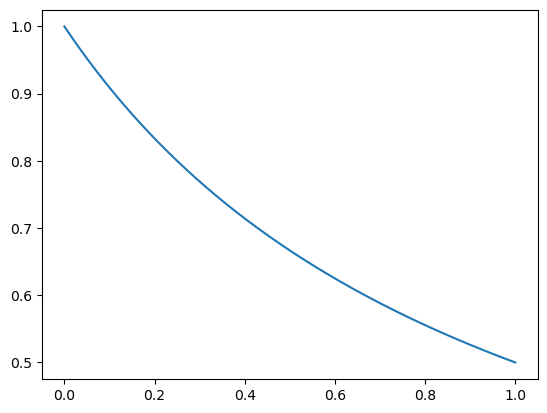

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(0, 1, 1000)
fun = lambda E, A, B: A/(B*(B**2 + E))
plt.plot(X, fun(X, 1, 1))

In [179]:
from scipy.special import airy
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt
ksi0 = 1
k = np.pi**(2/3)*np.sqrt(ksi0**(-1))
def fun (ksi):
    Ai1, _, Bi1, _ = airy(-k*ksi)
    Ai2, _, Bi2, _ = airy(-k*(ksi - 1))
    return Ai1*Bi2 - Ai2*Bi1


<IPython.core.display.Javascript object>


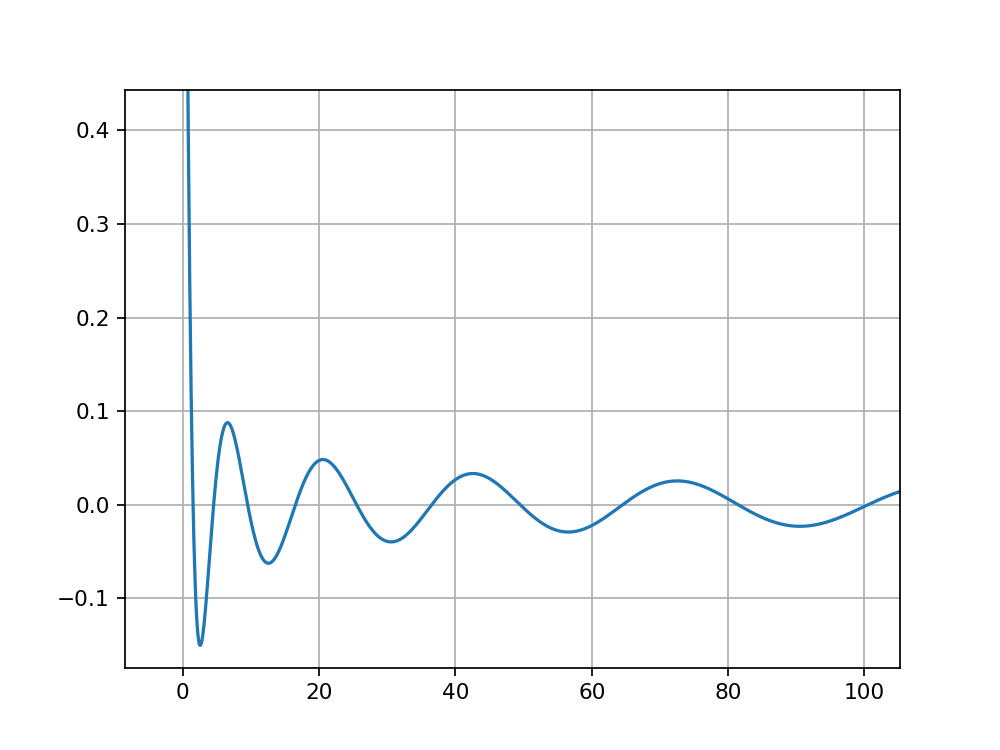

In [180]:
plt.grid()
Ksi = np.linspace(-1, 1000, 10000)
plt.plot(Ksi, fun(Ksi))

In [181]:
sol = fsolve(fun, [1, 5, 10, 16, 25, 37, 49, 65, 83, 100])
print(sol)

[  1.48919171   4.50320883   9.50192325  16.50117837  25.50078268
  36.50055428  49.50041198  64.50031779  81.50025238 100.50020517]


<IPython.core.display.Javascript object>


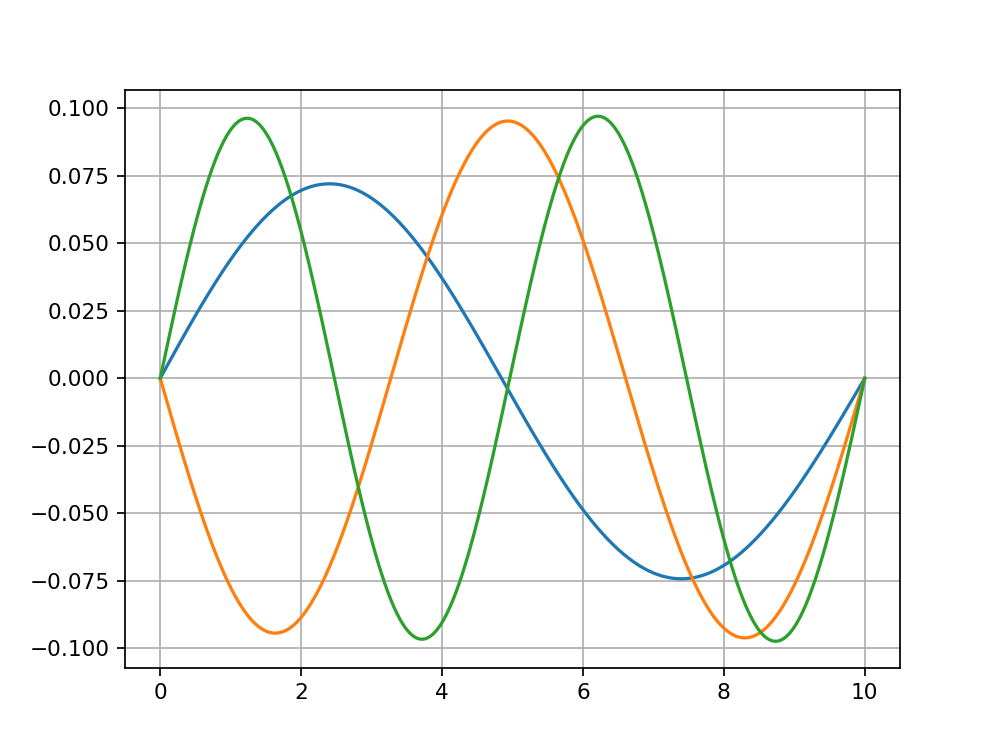

In [183]:
def C1toC2 (ksi):
    Ai1, _, Bi1, _ = airy(-k*ksi)
    return -Bi1/Ai1
a = 10
def normC (ksi):
    Ai1, Aip1, Bi1, Bip1 = airy(-k*ksi)
    Ai2, Aip2, Bi2, Bip2 = airy(-k*(ksi - 1))
    ck = C1toC2(ksi)
    return np.sqrt(np.abs(1 / ( a**2*(ck)**2 *(k*ksi*Ai1**2 - k*(ksi-1)*Ai2**2 + Aip1**2 - Aip2**2      )/k +
                  2*a**2*ck   *(k*ksi*Ai1*Bi1 - k*(ksi-1)*Ai2*Bi2 + Aip1*Bip1 - Aip2*Bip2)/k + 
                    a**2      *(k*ksi*Bi1**2 - k*(ksi-1)*Ai2**2 + Bip1**2 - Bip2**2      )/k )))

def psi (C1, C2, ksi, x):
    Ai, _, Bi, _ = airy(-k*(ksi-x/a))
    return C1*Ai + C2*Bi

normsol = [normC(ksi) for ksi in sol]
plt.grid()
X = np.linspace(0, a, 1000)
for j in range(5)[1:4]:
    plt.plot(X, psi(normsol[j]*C1toC2(sol[j]), normsol[j], sol[j], X))

<IPython.core.display.Javascript object>


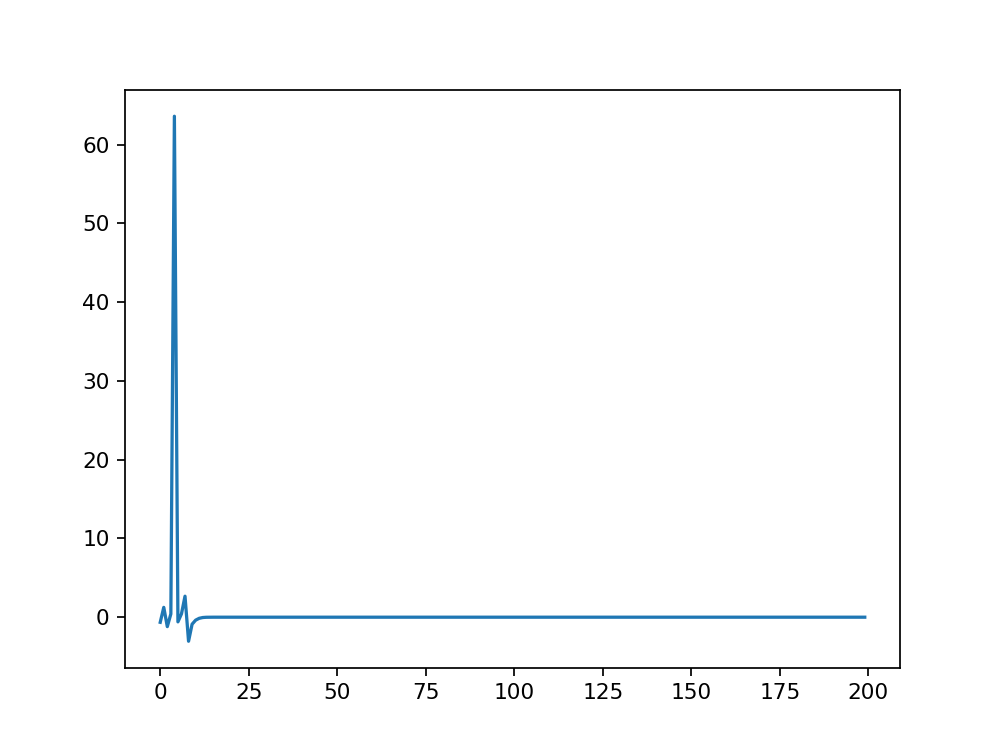

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, yv

delta = [jv(l+0.5, 10)/yv(l+0.5, 10) for l in range(200)]
plt.plot([l for l in range(200)], delta)

<IPython.core.display.Javascript object>


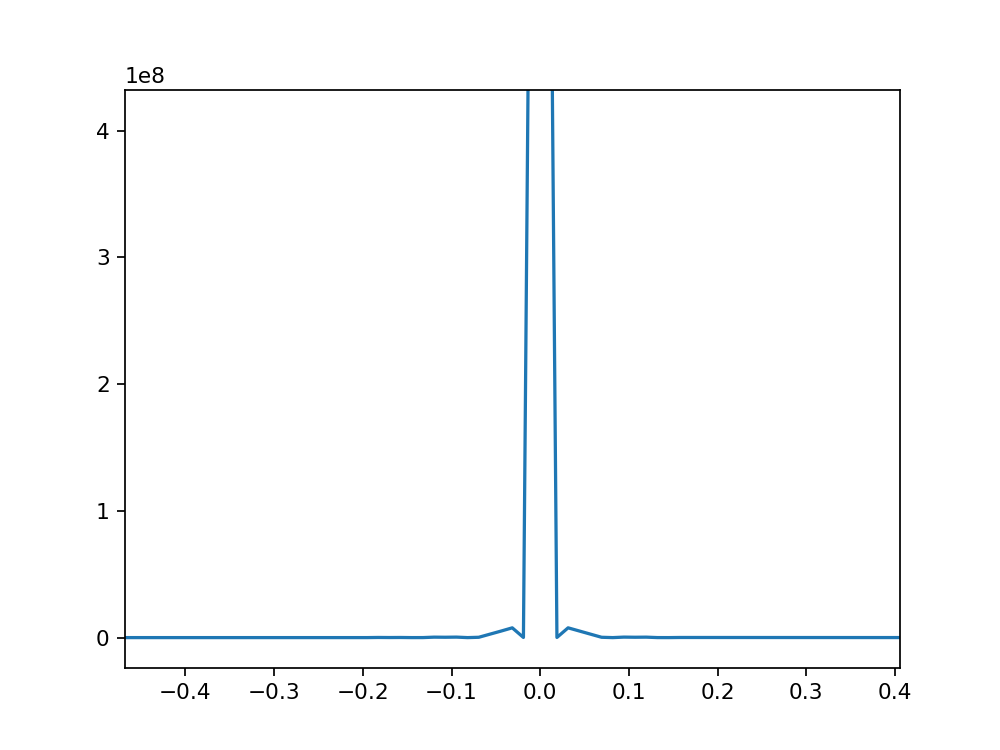

In [26]:
from scipy.special import eval_legendre
%matplotlib notebook
dsdo = np.abs(np.sum(np.array([[(2*l+1) * ((1-delta[l]**2)/(1+delta[l]**2) + 2j*delta[l]/(1+delta[l]**2))*eval_legendre(l, np.cos(t)) for l in range(200)] for t in np.linspace(-np.pi, np.pi, 500)]), axis=1))**2

np.shape(dsdo)
plt.plot(-np.linspace(-np.pi, np.pi, 500), dsdo)